In [125]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler


from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.metrics import (r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, make_scorer,
                             f1_score, roc_auc_score, roc_curve, precision_recall_curve)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from sklearn.dummy import DummyClassifier

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler


In [126]:
data = pd.read_csv('data/churn_train.csv')


In [127]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0


In [128]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_dist,40000.0,5.791302,5.708056,0.0,2.42,3.88,6.93,160.96
avg_rating_by_driver,39838.0,4.777434,0.448088,1.0,4.70,5.00,5.00,5.00
avg_rating_of_driver,33472.0,4.601697,0.614810,1.0,4.30,4.90,5.00,5.00
avg_surge,40000.0,1.074956,0.222427,1.0,1.00,1.00,1.05,8.00
surge_pct,40000.0,8.857342,20.014008,0.0,0.00,0.00,8.30,100.00
trips_in_first_30_days,40000.0,2.280700,3.811289,0.0,0.00,1.00,3.00,125.00
weekday_pct,40000.0,60.874382,37.089619,0.0,33.30,66.70,100.00,100.00


In [129]:

data[['phone']] = pd.get_dummies(data.phone.sort_values(),drop_first=1)

In [130]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,0,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,0,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,1,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,0,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,1,2014-01-31,0.0,0,False,100.0


In [131]:
data[['luxury_car_user']] = pd.get_dummies(data.luxury_car_user.sort_values(),drop_first=1)


In [132]:
data.city.unique()

array(['Astapor', 'Winterfell', "King's Landing"], dtype=object)

In [133]:
data['city'] = data.city.map({'Astapor':1, 'Winterfell':2, 'King\'s Landing':3})

In [134]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,1,2014-05-03,0,2014-01-12,0.0,0,0,100.0
1,8.06,5.0,5.0,1.00,1,2014-01-26,0,2014-01-25,0.0,2,1,0.0
2,21.50,4.0,NaN,1.00,2,2014-05-21,1,2014-01-02,0.0,1,1,100.0
3,9.46,5.0,NaN,2.75,2,2014-01-10,0,2014-01-09,100.0,1,0,100.0
4,13.77,5.0,NaN,1.00,2,2014-05-13,1,2014-01-31,0.0,0,0,100.0


In [135]:
data.isna().sum()

avg_dist                     0
avg_rating_by_driver       162
avg_rating_of_driver      6528
avg_surge                    0
city                         0
last_trip_date               0
phone                        0
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64

In [136]:
data['avg_rating_by_driver'] = data.avg_rating_by_driver.fillna(data.avg_rating_by_driver.mean())

In [137]:
data['avg_rating_of_driver'] = data.avg_rating_of_driver.fillna(data.avg_rating_of_driver.mean())

In [138]:
data.isna().sum()

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
luxury_car_user           0
weekday_pct               0
dtype: int64

In [139]:
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])  
data['es_activo']=data['last_trip_date'] >= '2014-06-01'

In [140]:
data.es_activo.unique()

array([False,  True])

In [141]:
data.head(200)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,es_activo
0,6.94,5.0,5.000000,1.00,1,2014-05-03,0,2014-01-12,0.0,0,0,100.0,False
1,8.06,5.0,5.000000,1.00,1,2014-01-26,0,2014-01-25,0.0,2,1,0.0,False
2,21.50,4.0,4.601697,1.00,2,2014-05-21,1,2014-01-02,0.0,1,1,100.0,False
3,9.46,5.0,4.601697,2.75,2,2014-01-10,0,2014-01-09,100.0,1,0,100.0,False
4,13.77,5.0,4.601697,1.00,2,2014-05-13,1,2014-01-31,0.0,0,0,100.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,6.29,5.0,3.500000,1.00,1,2014-01-25,0,2014-01-09,0.0,4,0,75.0,False
196,2.10,5.0,5.000000,1.00,2,2014-06-27,1,2014-01-10,0.0,0,0,100.0,True
197,6.43,4.0,4.601697,1.00,2,2014-05-03,0,2014-01-11,0.0,0,0,100.0,False
198,3.00,5.0,5.000000,1.00,1,2014-01-21,0,2014-01-20,0.0,1,0,100.0,False


In [142]:
data['last_trip_date']=pd.to_numeric(pd.to_datetime(data['last_trip_date']))
data['signup_date']=pd.to_numeric(pd.to_datetime(data['signup_date']))

In [143]:
y = data['es_activo']
X = data.drop(['es_activo','last_trip_date','signup_date'],axis=1)
X.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.000000,1.00,1,0,0.0,0,0,100.0
1,8.06,5.0,5.000000,1.00,1,0,0.0,2,1,0.0
2,21.50,4.0,4.601697,1.00,2,1,0.0,1,1,100.0
3,9.46,5.0,4.601697,2.75,2,0,100.0,1,0,100.0
4,13.77,5.0,4.601697,1.00,2,1,0.0,0,0,100.0


In [144]:
#Conjuntos de Entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [145]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [146]:
#modelo base
modelo_base = DummyClassifier(strategy='uniform').fit(X_train, y_train)
yhat_dc = modelo_base.predict(X_train)
accuracy_score(y_train, yhat_dc), precision_score(y_train, yhat_dc), recall_score(y_train, yhat_dc)
#metricas bajas que deben superarse por los modelos mas sofisticados

(0.5069029850746268, 0.385, 0.509128589756242)

### Modelos a probar

In [147]:
candidatos = [KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, xgb.XGBClassifier]

In [124]:
#se prueba el accuracy de los modelos candidato
accuracies = np.zeros(len(candidatos))
for i, Model in enumerate(candidatos):
    model = Model().fit(X_train, y_train)
    yhat = model.predict(X_test)
    score = accuracy_score(y_test, yhat)
    accuracies[i] = score

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

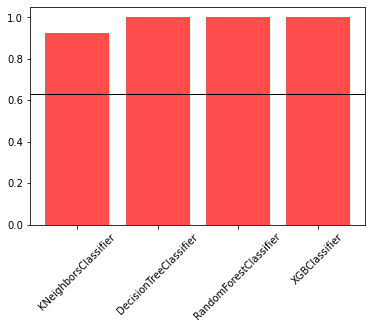

In [68]:
plt.bar([c.__name__ for c in candidatos], accuracies, color='red', alpha=0.7)
plt.axhline(y=0.63, linewidth=1, color='k')
plt.xticks(rotation=45);

# Se observa los modelos están sobre ajustrados menos el KNN

In [69]:
parameters = {'n_neighbors': range(2,25), 'metric': ['manhattan', 'euclidean']}
model = KNeighborsClassifier()
gs = GridSearchCV(model, parameters, cv=5, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)
gs.best_score_, gs.best_params_

Fitting 5 folds for each of 46 candidates, totalling 230 fits


(0.9342910447761194, {'metric': 'manhattan', 'n_neighbors': 19})

# Manhattan con  K = 19 son los mejores parametros para el modelo

In [70]:
final = KNeighborsClassifier(metric= 'manhattan', n_neighbors=19).fit(X_train, y_train)

In [71]:
final.score(X_test, y_test)

0.9359090909090909

In [176]:
data_test = pd.read_csv('data/churn_test.csv')

In [177]:
data_test.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,2.48,5.0,5.0,1.0,Winterfell,2014-01-07,Android,2014-01-06,0.0,2,True,100.0
1,10.81,5.0,5.0,1.0,Winterfell,2014-04-29,iPhone,2014-01-06,0.0,3,True,100.0
2,12.95,5.0,5.0,1.0,Astapor,2014-01-29,Android,2014-01-19,0.0,1,True,100.0
3,3.92,5.0,NaN,1.0,Winterfell,2014-02-16,iPhone,2014-01-09,0.0,0,False,0.0
4,1.46,5.0,4.5,1.0,Astapor,2014-01-09,iPhone,2014-01-07,0.0,2,False,100.0


In [178]:
data_test[['luxury_car_user']] = pd.get_dummies(data_test.luxury_car_user.sort_values(),drop_first=1)
data_test['city'] = data_test.city.map({'Astapor':1, 'Winterfell':2, 'King\'s Landing':3})
data_test['avg_rating_by_driver'] = data_test.avg_rating_by_driver.fillna(data_test.avg_rating_by_driver.mean())
data_test['avg_rating_of_driver'] = data_test.avg_rating_of_driver.fillna(data_test.avg_rating_of_driver.mean())
data_test['last_trip_date']=pd.to_numeric(pd.to_datetime(data_test['last_trip_date']))
data_test['signup_date']=pd.to_numeric(pd.to_datetime(data_test['signup_date']))
data_test[['phone']] = pd.get_dummies(data.phone.sort_values(),drop_first=1)

In [179]:
data_test.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,2.48,5.0,5.000000,1.0,2,1389052800000000000,0,1388966400000000000,0.0,2,1,100.0
1,10.81,5.0,5.000000,1.0,2,1398729600000000000,0,1388966400000000000,0.0,3,1,100.0
2,12.95,5.0,5.000000,1.0,1,1390953600000000000,1,1390089600000000000,0.0,1,1,100.0
3,3.92,5.0,4.601011,1.0,2,1392508800000000000,0,1389225600000000000,0.0,0,0,0.0
4,1.46,5.0,4.500000,1.0,1,1389225600000000000,1,1389052800000000000,0.0,2,0,100.0


In [180]:
scalar = StandardScaler()
data_test = scalar.fit_transform(data_test)

In [93]:
final.predict(data_test)

array([False, False, False, ...,  True, False, False])

In [181]:
data_predict = pd.read_csv('data/churn_test.csv')

In [182]:
data_predict.head(100)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,2.48,5.0,5.0,1.0,Winterfell,2014-01-07,Android,2014-01-06,0.0,2,True,100.0
1,10.81,5.0,5.0,1.0,Winterfell,2014-04-29,iPhone,2014-01-06,0.0,3,True,100.0
2,12.95,5.0,5.0,1.0,Astapor,2014-01-29,Android,2014-01-19,0.0,1,True,100.0
3,3.92,5.0,NaN,1.0,Winterfell,2014-02-16,iPhone,2014-01-09,0.0,0,False,0.0
4,1.46,5.0,4.5,1.0,Astapor,2014-01-09,iPhone,2014-01-07,0.0,2,False,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,6.92,5.0,5.0,1.0,Astapor,2014-02-23,iPhone,2014-01-20,0.0,3,False,75.0
96,3.86,4.5,5.0,1.0,Winterfell,2014-05-03,iPhone,2014-01-24,0.0,6,True,45.5
97,12.43,5.0,5.0,1.0,Winterfell,2014-01-02,Android,2014-01-01,0.0,1,True,100.0
98,2.97,4.8,5.0,1.0,Winterfell,2014-04-14,iPhone,2014-01-10,0.0,1,False,100.0


In [183]:
from pandas.plotting import scatter_matrix
data_predict[['luxury_car_user']] = pd.get_dummies(data_predict.luxury_car_user.sort_values(),drop_first=1)
data_predict['city'] = data_predict.city.map({'Astapor':1, 'Winterfell':2, 'King\'s Landing':3})
data_predict['avg_rating_by_driver'] = data_predict.avg_rating_by_driver.fillna(data_predict.avg_rating_by_driver.mean())
data_predict['avg_rating_of_driver'] = data_predict.avg_rating_of_driver.fillna(data_predict.avg_rating_of_driver.mean())
data_predict['last_trip_date']=pd.to_numeric(pd.to_datetime(data_predict['last_trip_date']))
data_predict['signup_date']=pd.to_numeric(pd.to_datetime(data_predict['signup_date']))
data_predict[['phone']] = pd.get_dummies(data_predict.phone.sort_values(),drop_first=1)


In [184]:
data_predict['es_activo'] = final.predict(data_test)

In [189]:
data_predict['es_activo'] = pd.get_dummies(data.es_activo.sort_values(),drop_first=1)

In [187]:
data_predict.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,es_activo
0,2.48,5.0,5.000000,1.0,2,1389052800000000000,0,1388966400000000000,0.0,2,1,100.0,False
1,10.81,5.0,5.000000,1.0,2,1398729600000000000,1,1388966400000000000,0.0,3,1,100.0,False
2,12.95,5.0,5.000000,1.0,1,1390953600000000000,0,1390089600000000000,0.0,1,1,100.0,False
3,3.92,5.0,4.601011,1.0,2,1392508800000000000,1,1389225600000000000,0.0,0,0,0.0,False
4,1.46,5.0,4.500000,1.0,1,1389225600000000000,1,1389052800000000000,0.0,2,0,100.0,False


In [ ]:
scatter_matrix(data_predict, figsize=(15,15));